In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.applications.inception_resnet_v2 import InceptionResNetV2
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Model,Sequential
from keras.preprocessing.image import img_to_array,load_img
from keras.layers import Dense,GlobalAveragePooling2D,Input,Embedding,InputLayer,Activation,Flatten,Conv2D,MaxPooling2D
import os
#print(os.listdir("../input"))
import glob
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm,tqdm_notebook
import tensorflow as tf
from tqdm import tqdm
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from zipfile import ZipFile

In [0]:
filedir='/content/drive/My Drive/flickr-image-dataset.zip'

In [0]:
f=ZipFile(filedir)

In [0]:
f.extractall("imges")

In [0]:
df=pd.read_csv("/content/imges/flickr30k_images/results.csv",delimiter='|')

In [8]:
df.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [0]:
imgbasedir="/content/imges/flickr30k_images/flickr30k_images/"

In [0]:
imgdir=glob.glob(imgbasedir+"*.jpg")

In [11]:
imgdir[:5]

['/content/imges/flickr30k_images/flickr30k_images/4966860594.jpg',
 '/content/imges/flickr30k_images/flickr30k_images/7436111546.jpg',
 '/content/imges/flickr30k_images/flickr30k_images/2634334121.jpg',
 '/content/imges/flickr30k_images/flickr30k_images/86289724.jpg',
 '/content/imges/flickr30k_images/flickr30k_images/2358554995.jpg']

 Two young guys with shaggy hair look at their hands while hanging out in the yard .
(500, 333, 3)


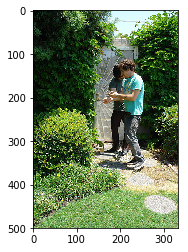

In [12]:
img=cv2.imread(imgbasedir+df.image_name.iloc[0])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(df[' comment'].iloc[0])
print(img.shape)

In [0]:
imagesize=(299,299,3)

In [0]:
def fun1(df1):
    m=list(df1[" comment"].values)
    return m

In [0]:
df1=df.groupby(by='image_name').apply(fun1)

In [0]:
index1=df1.index
values=df1.values

In [0]:
dict1=dict([(index1[i],values[i]) for i in range(len(values))])

In [18]:
model=InceptionResNetV2(include_top=False,weights='imagenet',input_shape=(299,299,3))

W0726 06:00:25.312251 139713176815488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 06:00:25.373595 139713176815488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 06:00:25.400830 139713176815488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 06:00:25.442024 139713176815488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0726 06:00:25.442887 1397131768

219062272/219055592 [==============================] - 9s 0us/step


In [0]:
for layer in model.layers:
  layer.trainable=False
  
bottommodel=model.output
topmodel=GlobalAveragePooling2D()(bottommodel)
  

In [0]:
model1=Model(model.input,topmodel)

In [0]:
pred1=[]                          #due to memory constraints ,getting encodings in batches of 5000
for i in range(0,30000,5000):
    index2=index1[i:i+5000]
    xtrain=[]
    for i in range(len(index2)):
        img=cv2.imread(imgbasedir+index2[i])
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(299,299)).astype('float16')
        xtrain.append(img)
    xtrain=np.array(xtrain).astype('float16')/255
    pred=model1.predict(xtrain)
    pred1.append(pred)

In [0]:
xtrain=[]  # To Free up some Memory
pred=[]
pred2=np.vstack(pred1)


In [0]:
pred1=0

In [0]:
import random  #Getting the captioning text  for first 30000 images
tokendata=[random.sample(dict1[index1[i]],1)[0] for i in range(30000)]

In [0]:
Imgbottleneck=120
wordembedsize=32
rnnsize=256
ns=1536

In [0]:
import re

In [0]:
def fun(text):
    
    text=text.lower()
    text=re.sub(r"[^\w\d]"," ",text)
    text=re.sub(r"\s{2,}"," ",text)
    text=text.strip()
    return text


In [0]:
tokendata1=[fun(i) for i in tokendata]

In [0]:
tokendata1=np.array(tokendata1)

In [0]:
tokenizer=Tokenizer(num_words=3997,oov_token='<unk>')

In [0]:
tokenizer.fit_on_texts(tokendata1)

In [0]:
tokendata2=tokenizer.texts_to_sequences(tokendata1)

In [0]:
wordcount=tokenizer.word_counts

In [34]:
len([i for i,j in wordcount.items() if j>=4])

3915

In [0]:
word2index=tokenizer.word_index
word2index=dict([(i,j) for i,j in word2index.items() if j <=3997])
word2index['<pad>']=0
word2index['<start>']=len(word2index)
word2index['<end>']=len(word2index)

In [0]:
index2word=dict([(i,j) for j,i in word2index.items()])

In [0]:
tokendata3=[[word2index['<start>']]+tokendata2[i]+[word2index['<end>']] for i in range(len(tokendata2))]

In [0]:
length=[len(x) for x in tokendata3]

In [0]:
imgembedsize=1536
logitsbottleneck=128
rnnsize=256
Imgbottleneck=128
wordembedsize=32


In [0]:
imgemb=tf.placeholder(shape=[None,1536],dtype=tf.float32)
sentences=tf.placeholder(shape=[None,None],dtype=tf.int32)
drop1=tf.placeholder(shape=[],dtype=tf.float32)
drop_imgemb=tf.nn.dropout(imgemb,keep_prob=drop1)
imgembed_bottleneck=tf.layers.dense(drop_imgemb,Imgbottleneck,activation=tf.nn.relu,kernel_initializer=tf.random_normal_initializer)

In [0]:
drop2=tf.placeholder(shape=[],dtype=tf.float32)
drop3=tf.placeholder(shape=[],dtype=tf.float32)

In [44]:
imgbottle_h=tf.layers.dense(imgembed_bottleneck,ns,activation=tf.nn.relu,kernel_initializer=tf.random_normal_initializer)
dropimgbottle_h=tf.nn.dropout(imgbottle_h,keep_prob=drop2)
embedvar=tf.Variable(tf.random.normal([len(word2index),wordembedsize],0,1.0,dtype=tf.float32))
wordembed=tf.nn.embedding_lookup(embedvar,sentences[:,:-1])
dropwordembed=tf.nn.dropout(wordembed,keep_prob=drop3)
lstm=tf.nn.rnn_cell.LSTMCell(ns,dtype=tf.float32)

W0726 07:08:15.211604 139713176815488 deprecation.py:323] From <ipython-input-44-4620ebe0f1b9>:6: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [0]:
c0=h0=dropimgbottle_h

In [0]:
seqlen=tf.placeholder(shape=[None],dtype=tf.int32)

In [49]:
hiddenstates,_=tf.nn.dynamic_rnn(lstm,dropwordembed,sequence_length=seqlen,initial_state=tf.nn.rnn_cell.LSTMStateTuple(c0,h0),dtype=tf.float32)

W0726 07:11:08.177134 139713176815488 deprecation.py:323] From <ipython-input-49-a7736e592d59>:1: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W0726 07:11:08.303905 139713176815488 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 07:11:08.316709 139713176815488 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/rnn_cell_impl.py:961: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call init

In [50]:
hiddenstates.get_shape()


TensorShape([Dimension(None), Dimension(None), Dimension(1536)])

In [0]:
tokenlogitsbottleneck=tf.layers.dense(hiddenstates,logitsbottleneck,activation=tf.nn.relu,kernel_initializer=tf.random_normal_initializer)

In [0]:
tokenlogits=tf.layers.dense(tokenlogitsbottleneck,len(word2index))

In [53]:
tokenlogits.get_shape()

TensorShape([Dimension(None), Dimension(None), Dimension(4000)])

In [0]:
len1=len(word2index)

In [0]:
finaltokenlogits=tf.reshape(tokenlogits,(-1,len1))

In [57]:
finaltokenlogits.get_shape()

TensorShape([Dimension(None), Dimension(4000)])

In [0]:
flatgroundtruth=tf.reshape(sentences[:,1:],[-1,])

In [0]:
flat_loss_mask = tf.not_equal(word2index['<pad>'],flatgroundtruth)

In [0]:
xent=tf.nn.sparse_softmax_cross_entropy_with_logits(logits=finaltokenlogits,labels=flatgroundtruth)

In [0]:
loss=tf.reduce_mean(tf.boolean_mask(xent,flat_loss_mask))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train_step = optimizer.minimize(loss)

In [0]:
saver = tf.train.Saver()

In [0]:
s=tf.InteractiveSession()

In [0]:
s.run(tf.global_variables_initializer())

In [66]:
len(length)

30000

(array([4.600e+01, 1.580e+02, 2.061e+03, 2.144e+03, 2.488e+03, 5.915e+03,
        2.813e+03, 2.464e+03, 4.152e+03, 1.567e+03, 1.231e+03, 1.806e+03,
        6.500e+02, 9.050e+02, 3.030e+02, 2.600e+02, 3.790e+02, 1.310e+02,
        9.100e+01, 1.470e+02, 5.100e+01, 3.700e+01, 6.100e+01, 3.300e+01,
        1.700e+01, 2.900e+01, 6.000e+00, 1.500e+01, 1.000e+01, 5.000e+00,
        7.000e+00, 1.000e+00, 4.000e+00, 5.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 4.  ,  5.36,  6.72,  8.08,  9.44, 10.8 , 12.16, 13.52, 14.88,
        16.24, 17.6 , 18.96, 20.32, 21.68, 23.04, 24.4 , 25.76, 27.12,
        28.48, 29.84, 31.2 , 32.56, 33.92, 35.28, 36.64, 38.  , 39.36,
        40.72, 42.08, 43.44, 44.8 , 46.16, 47.52, 48.88, 50.24, 51.6 ,
        52.96, 54.32, 55.68, 57.04, 58.4 , 59.76, 61.12, 62.48, 63.84,
        65.2 , 66.56,

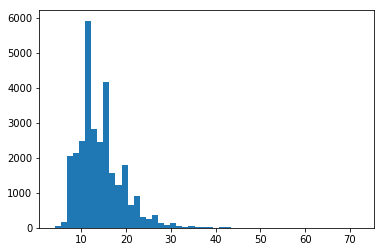

In [67]:
plt.hist(length,bins=50)

In [0]:
def generate_batch(images_embeddings, indexed_captions,lengths,batch_size, max_len=None):
    
    if batch_size==None:
      batch_size=len(images_embeddings)
    m=np.random.choice(len(images_embeddings),size=batch_size,replace=False)
    batchcaptions =indexed_captions[m] 
    batch_image_embeddings = images_embeddings[m]
    len1=lengths[m]
    batch_captions_matrix=pad_sequences(batchcaptions,maxlen=max_len,padding='post')
    
    
    return (batch_image_embeddings, 
            batch_captions_matrix,len1)

In [0]:
batch_size = 64
n_epochs = 10
n_batches_per_epoch = 500
n_validation_batches = 100

In [70]:
generate_batch(pred2,np.array(tokendata3),np.array(length),64,None)[1].shape

(64, 38)

In [0]:
#Creating Training ,Validation datasets
trainlabels,validlabels=train_test_split(np.arange(30000),test_size=0.01)

In [0]:
trainXdata=pred2[trainlabels]
trainYdata=np.array(tokendata3)[trainlabels]
trainlength=np.array(length)[trainlabels]
validXdata=pred2[validlabels]
validYdata=np.array(tokendata3)[validlabels]
validlength=np.array(length)[validlabels]

In [0]:
validXdata.shape
d1=0.75
d2=0.75
d3=0.75

In [80]:
trainloss=[]
count=0
validloss=[]
for i in range(n_epochs):
  for j in tqdm(range(n_batches_per_epoch)):
    batchx,batchy,batchlen=generate_batch(trainXdata,trainYdata,trainlength,64,None)
    loss1,_=s.run([loss,train_step],feed_dict={imgemb:batchx,sentences:batchy,seqlen:batchlen,drop1:d1,drop2:d2,drop3:d3})
    
    if count%50==0:
      #print("-----trainloss:-",loss1," count:-",count)
      batchx,batchy,batchlen=generate_batch(validXdata,validYdata,validlength,None,None)
      validloss1=s.run(loss,feed_dict={imgemb:batchx,sentences:batchy,seqlen:batchlen,drop1:1.0,drop2:1.0,drop3:1.0})
      print("-----validloss:-",validloss1,"---trainloss:-",loss1,"  count:-",count)
      validloss.append(validloss1)
    count+=1
    trainloss.append(loss1)

  0%|          | 2/500 [00:00<01:30,  5.49it/s]

-----validloss:- 7.7984114 ---trainloss:- 9.975037   count:- 0


 10%|█         | 52/500 [00:04<00:40, 11.12it/s]

-----validloss:- 5.0345078 ---trainloss:- 5.060325   count:- 50


 20%|██        | 102/500 [00:08<00:37, 10.62it/s]

-----validloss:- 4.7497463 ---trainloss:- 5.0333366   count:- 100


 30%|███       | 152/500 [00:12<00:32, 10.65it/s]

-----validloss:- 4.563982 ---trainloss:- 4.833097   count:- 150


 40%|████      | 202/500 [00:16<00:25, 11.74it/s]

-----validloss:- 4.4285913 ---trainloss:- 4.615882   count:- 200


 50%|█████     | 252/500 [00:21<00:22, 11.11it/s]

-----validloss:- 4.3298407 ---trainloss:- 4.6695213   count:- 250


 60%|██████    | 302/500 [00:25<00:18, 10.71it/s]

-----validloss:- 4.224028 ---trainloss:- 4.4035177   count:- 300


 70%|███████   | 352/500 [00:29<00:13, 10.72it/s]

-----validloss:- 4.1578903 ---trainloss:- 4.3819733   count:- 350


 80%|████████  | 402/500 [00:33<00:09, 10.47it/s]

-----validloss:- 4.1093197 ---trainloss:- 4.2165103   count:- 400


 90%|█████████ | 452/500 [00:37<00:04, 10.37it/s]

-----validloss:- 4.042164 ---trainloss:- 4.234191   count:- 450


  1%|          | 3/500 [00:00<01:10,  7.06it/s]

-----validloss:- 4.0046406 ---trainloss:- 4.029925   count:- 500


 11%|█         | 53/500 [00:04<00:40, 11.02it/s]

-----validloss:- 3.97536 ---trainloss:- 4.018758   count:- 550


 21%|██        | 103/500 [00:08<00:36, 10.95it/s]

-----validloss:- 3.9262242 ---trainloss:- 4.0376067   count:- 600


 31%|███       | 153/500 [00:12<00:27, 12.59it/s]

-----validloss:- 3.9146063 ---trainloss:- 3.9329116   count:- 650


 41%|████      | 203/500 [00:16<00:24, 12.26it/s]

-----validloss:- 3.9015107 ---trainloss:- 3.7233832   count:- 700


 51%|█████     | 253/500 [00:21<00:22, 11.07it/s]

-----validloss:- 3.8502743 ---trainloss:- 4.0980506   count:- 750


 61%|██████    | 303/500 [00:25<00:18, 10.78it/s]

-----validloss:- 3.8472655 ---trainloss:- 3.740082   count:- 800


 71%|███████   | 353/500 [00:29<00:12, 11.37it/s]

-----validloss:- 3.8306127 ---trainloss:- 3.8734612   count:- 850


 81%|████████  | 403/500 [00:33<00:08, 11.39it/s]

-----validloss:- 3.7892294 ---trainloss:- 3.9573932   count:- 900


 91%|█████████ | 453/500 [00:38<00:04, 11.27it/s]

-----validloss:- 3.776531 ---trainloss:- 3.677063   count:- 950


  1%|          | 3/500 [00:00<01:05,  7.57it/s]

-----validloss:- 3.7489934 ---trainloss:- 3.7963464   count:- 1000


 11%|█         | 53/500 [00:04<00:43, 10.28it/s]

-----validloss:- 3.7327561 ---trainloss:- 3.8861408   count:- 1050


 21%|██        | 103/500 [00:08<00:36, 10.74it/s]

-----validloss:- 3.7088668 ---trainloss:- 3.7873054   count:- 1100


 31%|███       | 153/500 [00:12<00:31, 11.10it/s]

-----validloss:- 3.6918278 ---trainloss:- 3.6069152   count:- 1150


 41%|████      | 203/500 [00:16<00:26, 11.18it/s]

-----validloss:- 3.677407 ---trainloss:- 3.8939254   count:- 1200


 51%|█████     | 253/500 [00:20<00:21, 11.24it/s]

-----validloss:- 3.6658435 ---trainloss:- 3.6926804   count:- 1250


 61%|██████    | 303/500 [00:25<00:17, 10.97it/s]

-----validloss:- 3.6512232 ---trainloss:- 3.6601346   count:- 1300


 71%|███████   | 353/500 [00:29<00:13, 10.86it/s]

-----validloss:- 3.6372573 ---trainloss:- 3.8195226   count:- 1350


 81%|████████  | 403/500 [00:33<00:09, 10.51it/s]

-----validloss:- 3.635634 ---trainloss:- 3.5498521   count:- 1400


 91%|█████████ | 453/500 [00:37<00:04, 11.52it/s]

-----validloss:- 3.6187942 ---trainloss:- 3.4895046   count:- 1450


  1%|          | 3/500 [00:00<01:01,  8.05it/s]

-----validloss:- 3.6176817 ---trainloss:- 3.6382327   count:- 1500


 11%|█         | 53/500 [00:04<00:38, 11.66it/s]

-----validloss:- 3.5913405 ---trainloss:- 3.4250364   count:- 1550


 21%|██        | 103/500 [00:08<00:34, 11.43it/s]

-----validloss:- 3.5883243 ---trainloss:- 3.7285461   count:- 1600


 31%|███       | 153/500 [00:12<00:31, 11.10it/s]

-----validloss:- 3.5757167 ---trainloss:- 3.770225   count:- 1650


 41%|████      | 203/500 [00:17<00:26, 11.10it/s]

-----validloss:- 3.5843322 ---trainloss:- 3.5928514   count:- 1700


 51%|█████     | 253/500 [00:21<00:21, 11.40it/s]

-----validloss:- 3.5566375 ---trainloss:- 3.567663   count:- 1750


 61%|██████    | 303/500 [00:25<00:18, 10.67it/s]

-----validloss:- 3.5382302 ---trainloss:- 3.4364696   count:- 1800


 71%|███████   | 353/500 [00:29<00:12, 11.51it/s]

-----validloss:- 3.5520067 ---trainloss:- 3.4365695   count:- 1850


 80%|████████  | 401/500 [00:33<00:09, 10.62it/s]

-----validloss:- 3.5569434 ---trainloss:- 3.5258985   count:- 1900


 91%|█████████ | 453/500 [00:37<00:04, 11.43it/s]

-----validloss:- 3.5315552 ---trainloss:- 3.7538037   count:- 1950


  1%|          | 3/500 [00:00<01:07,  7.33it/s]

-----validloss:- 3.5386891 ---trainloss:- 3.4882932   count:- 2000


 11%|█         | 53/500 [00:04<00:36, 12.11it/s]

-----validloss:- 3.524709 ---trainloss:- 3.2498515   count:- 2050


 21%|██        | 103/500 [00:08<00:34, 11.39it/s]

-----validloss:- 3.5076928 ---trainloss:- 3.2499893   count:- 2100


 30%|███       | 151/500 [00:12<00:34, 10.01it/s]

-----validloss:- 3.5011582 ---trainloss:- 3.2784219   count:- 2150


 41%|████      | 203/500 [00:16<00:26, 11.37it/s]

-----validloss:- 3.5031445 ---trainloss:- 3.5088105   count:- 2200


 51%|█████     | 253/500 [00:20<00:21, 11.74it/s]

-----validloss:- 3.4978547 ---trainloss:- 3.3023221   count:- 2250


 61%|██████    | 303/500 [00:24<00:17, 11.09it/s]

-----validloss:- 3.499392 ---trainloss:- 3.6044796   count:- 2300


 71%|███████   | 353/500 [00:29<00:12, 11.92it/s]

-----validloss:- 3.4924212 ---trainloss:- 3.2403944   count:- 2350


 81%|████████  | 403/500 [00:33<00:09, 10.58it/s]

-----validloss:- 3.4772499 ---trainloss:- 3.478345   count:- 2400


 90%|█████████ | 451/500 [00:37<00:04, 10.85it/s]

-----validloss:- 3.4925656 ---trainloss:- 3.4834027   count:- 2450


  1%|          | 3/500 [00:00<01:10,  7.07it/s]

-----validloss:- 3.4836378 ---trainloss:- 3.274395   count:- 2500


 11%|█         | 53/500 [00:04<00:38, 11.56it/s]

-----validloss:- 3.4792316 ---trainloss:- 3.3136058   count:- 2550


 20%|██        | 101/500 [00:08<00:35, 11.35it/s]

-----validloss:- 3.4674919 ---trainloss:- 3.359619   count:- 2600


 31%|███       | 153/500 [00:12<00:28, 12.31it/s]

-----validloss:- 3.4693449 ---trainloss:- 3.3128092   count:- 2650


 41%|████      | 203/500 [00:16<00:25, 11.66it/s]

-----validloss:- 3.4461699 ---trainloss:- 3.4148614   count:- 2700


 51%|█████     | 253/500 [00:21<00:22, 11.10it/s]

-----validloss:- 3.4699476 ---trainloss:- 3.412488   count:- 2750


 61%|██████    | 303/500 [00:25<00:15, 12.45it/s]

-----validloss:- 3.4628158 ---trainloss:- 3.5466917   count:- 2800


 71%|███████   | 353/500 [00:29<00:12, 11.59it/s]

-----validloss:- 3.4566658 ---trainloss:- 3.3570588   count:- 2850


 81%|████████  | 403/500 [00:33<00:08, 10.95it/s]

-----validloss:- 3.4483314 ---trainloss:- 3.3516188   count:- 2900


 91%|█████████ | 453/500 [00:37<00:04, 10.99it/s]

-----validloss:- 3.4496365 ---trainloss:- 3.5158765   count:- 2950


  1%|          | 3/500 [00:00<01:06,  7.45it/s]

-----validloss:- 3.436085 ---trainloss:- 3.438497   count:- 3000


 10%|█         | 51/500 [00:04<00:40, 10.97it/s]

-----validloss:- 3.440682 ---trainloss:- 3.3922153   count:- 3050


 21%|██        | 103/500 [00:08<00:35, 11.11it/s]

-----validloss:- 3.457115 ---trainloss:- 3.2608802   count:- 3100


 31%|███       | 153/500 [00:12<00:31, 10.99it/s]

-----validloss:- 3.4414728 ---trainloss:- 3.0347545   count:- 3150


 41%|████      | 203/500 [00:16<00:28, 10.36it/s]

-----validloss:- 3.454484 ---trainloss:- 3.2174659   count:- 3200


 51%|█████     | 253/500 [00:20<00:21, 11.67it/s]

-----validloss:- 3.4452648 ---trainloss:- 3.3803868   count:- 3250


 61%|██████    | 303/500 [00:24<00:17, 11.17it/s]

-----validloss:- 3.4500446 ---trainloss:- 3.26582   count:- 3300


 71%|███████   | 353/500 [00:29<00:13, 10.77it/s]

-----validloss:- 3.4417205 ---trainloss:- 3.3578157   count:- 3350


 81%|████████  | 403/500 [00:33<00:08, 11.55it/s]

-----validloss:- 3.4443965 ---trainloss:- 2.9627738   count:- 3400


 91%|█████████ | 453/500 [00:37<00:04, 11.19it/s]

-----validloss:- 3.457477 ---trainloss:- 3.1070828   count:- 3450


  1%|          | 3/500 [00:00<01:13,  6.81it/s]

-----validloss:- 3.4383597 ---trainloss:- 3.1320145   count:- 3500


 11%|█         | 54/500 [00:04<00:37, 12.02it/s]

-----validloss:- 3.4528956 ---trainloss:- 3.0746207   count:- 3550


 20%|██        | 102/500 [00:08<00:36, 10.87it/s]

-----validloss:- 3.4535058 ---trainloss:- 3.2180326   count:- 3600


 30%|███       | 152/500 [00:12<00:32, 10.63it/s]

-----validloss:- 3.4364457 ---trainloss:- 3.3958383   count:- 3650


 40%|████      | 202/500 [00:16<00:28, 10.52it/s]

-----validloss:- 3.449621 ---trainloss:- 3.2521126   count:- 3700


 50%|█████     | 252/500 [00:20<00:22, 11.10it/s]

-----validloss:- 3.4267607 ---trainloss:- 2.960244   count:- 3750


 60%|██████    | 302/500 [00:24<00:18, 10.97it/s]

-----validloss:- 3.4546516 ---trainloss:- 3.3256772   count:- 3800


 70%|███████   | 352/500 [00:29<00:13, 11.31it/s]

-----validloss:- 3.44369 ---trainloss:- 3.1383178   count:- 3850


 80%|████████  | 402/500 [00:33<00:08, 11.05it/s]

-----validloss:- 3.451337 ---trainloss:- 3.2741466   count:- 3900


 90%|█████████ | 452/500 [00:37<00:04, 10.41it/s]

-----validloss:- 3.4504297 ---trainloss:- 3.034047   count:- 3950


  1%|          | 3/500 [00:00<01:11,  6.94it/s]

-----validloss:- 3.4439695 ---trainloss:- 3.2297373   count:- 4000


 11%|█         | 53/500 [00:04<00:44, 10.03it/s]

-----validloss:- 3.4477675 ---trainloss:- 2.9321785   count:- 4050


 21%|██        | 103/500 [00:08<00:37, 10.59it/s]

-----validloss:- 3.4523985 ---trainloss:- 2.9996881   count:- 4100


 31%|███       | 153/500 [00:12<00:29, 11.63it/s]

-----validloss:- 3.4410176 ---trainloss:- 3.2726753   count:- 4150


 41%|████      | 203/500 [00:16<00:26, 11.31it/s]

-----validloss:- 3.45405 ---trainloss:- 3.0614984   count:- 4200


 51%|█████     | 253/500 [00:21<00:23, 10.71it/s]

-----validloss:- 3.4638 ---trainloss:- 3.0707564   count:- 4250


 61%|██████    | 303/500 [00:25<00:18, 10.83it/s]

-----validloss:- 3.436902 ---trainloss:- 3.094043   count:- 4300


 71%|███████   | 353/500 [00:29<00:12, 11.43it/s]

-----validloss:- 3.4629633 ---trainloss:- 3.1983669   count:- 4350


 81%|████████  | 403/500 [00:33<00:09, 10.57it/s]

-----validloss:- 3.4641254 ---trainloss:- 3.0011005   count:- 4400


 91%|█████████ | 453/500 [00:37<00:04, 10.89it/s]

-----validloss:- 3.475136 ---trainloss:- 3.2083929   count:- 4450


  1%|          | 3/500 [00:00<01:06,  7.48it/s]

-----validloss:- 3.4622128 ---trainloss:- 2.86624   count:- 4500


 10%|█         | 52/500 [00:04<00:42, 10.66it/s]

-----validloss:- 3.4474096 ---trainloss:- 3.057929   count:- 4550


 20%|██        | 102/500 [00:08<00:35, 11.07it/s]

-----validloss:- 3.43374 ---trainloss:- 3.000486   count:- 4600


 30%|███       | 152/500 [00:12<00:31, 11.19it/s]

-----validloss:- 3.4475026 ---trainloss:- 2.9714131   count:- 4650


 40%|████      | 202/500 [00:16<00:28, 10.33it/s]

-----validloss:- 3.4584553 ---trainloss:- 3.0137122   count:- 4700


 50%|█████     | 252/500 [00:20<00:23, 10.58it/s]

-----validloss:- 3.4593701 ---trainloss:- 3.0872335   count:- 4750


 60%|██████    | 302/500 [00:25<00:18, 10.93it/s]

-----validloss:- 3.4646835 ---trainloss:- 2.946639   count:- 4800


 70%|███████   | 352/500 [00:29<00:15,  9.59it/s]

-----validloss:- 3.4758909 ---trainloss:- 2.9124725   count:- 4850


 80%|████████  | 402/500 [00:33<00:09, 10.67it/s]

-----validloss:- 3.4881403 ---trainloss:- 2.8661516   count:- 4900


 90%|█████████ | 452/500 [00:37<00:04, 10.18it/s]

-----validloss:- 3.4777694 ---trainloss:- 2.9830258   count:- 4950


100%|██████████| 500/500 [00:41<00:00, 12.49it/s]


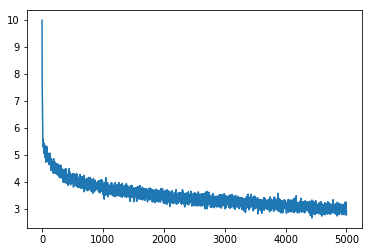

In [81]:
plt.plot(trainloss)

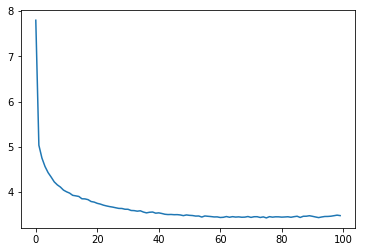

In [82]:
plt.plot(validloss)

In [0]:
# Addred Dropout to imgembeddings
# Added Dropout to Encoded sentences produced by  output of embedded sentences
